# Data Exploratory Analysis
The following outlines the process I used to understand and analyze the dataset.

In [1]:
# The first step involves importing the libraries required for the process:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,shapiro, ttest_ind, kruskal, levene

# The graphics style selected is:
plt.style.use('ggplot')

In [2]:
# The following allows us to view all the columns of the dataset, regardless of its size:
pd.set_option('display.max_columns', None)

In [3]:
# Then the dataset is loaded as:
corn = pd.read_csv("C://Users/jober/Data_Projects/corn-yield-prediction/Dataset/corn_data.csv", sep=";", )

## Step 1: Understanding the data
This step give us a general sense of the dataset: 

In [4]:
corn.shape

(422, 22)

In [5]:
corn.head()

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,Yield,Power source,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
0,TAITA TAVETA,fmr_65,Certificate,Male,36-45,7,corn,2.00,50,2,300,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.46,38.35
1,TAITA TAVETA,fmr_77,Certificate,Male,36-45,7,corn,0.25,50,2,270,Manual,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.31,38.40
2,TAITA TAVETA,fmr_89,Certificate,Male,36-45,7,corn,3.00,251,2,270,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.41,38.37
3,TAITA TAVETA,fmr_102,Certificate,Male,36-45,7,corn,1.50,300,3,200,Manual,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.39,38.37
4,TAITA TAVETA,fmr_25,Certificate,Male,46-55,3,corn,NaN,50,2,180,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.39,38.33


In [6]:
corn.columns

Index(['County', 'Farmer', 'Education', 'Gender', 'Age bracket',
       'Household size', 'Crop', 'Acreage', 'Fertilizer amount', 'Laborers',
       'Yield', 'Power source', 'Water source', 'Main credit source',
       'Crop insurance', 'Farm records', 'Main advisory source',
       'Extension provider', 'Advisory format', 'Advisory language',
       'Latitude', 'Longitude'],
      dtype='object')

In [7]:
# Using the info() method, we can quickly identify the data type of each column and detect null values:"
corn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                422 non-null    object 
 1   Farmer                422 non-null    object 
 2   Education             396 non-null    object 
 3   Gender                422 non-null    object 
 4   Age bracket           422 non-null    object 
 5   Household size        422 non-null    int64  
 6   Crop                  422 non-null    object 
 7   Acreage               351 non-null    float64
 8   Fertilizer amount     422 non-null    int64  
 9   Laborers              422 non-null    int64  
 10  Yield                 422 non-null    int64  
 11  Power source          422 non-null    object 
 12  Water source          422 non-null    object 
 13  Main credit source    422 non-null    object 
 14  Crop insurance        422 non-null    object 
 15  Farm records          4

In [8]:
# The number of null values in the dataset is confirmed as:
corn.isna().sum()

County                   0
Farmer                   0
Education               26
Gender                   0
Age bracket              0
Household size           0
Crop                     0
Acreage                 71
Fertilizer amount        0
Laborers                 0
Yield                    0
Power source             0
Water source             0
Main credit source       0
Crop insurance           0
Farm records             0
Main advisory source     0
Extension provider       0
Advisory format          0
Advisory language        0
Latitude                 0
Longitude                0
dtype: int64

In [9]:
# The describe() function provides basic statistics for the numerical variables in the dataset:
corn.describe()

,Household size,Acreage,Fertilizer amount,Laborers,Yield,Latitude,Longitude
count,422.000000,351.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,4.263033,0.828063,65.189573,2.843602,232.604265,-3.417583,38.404455
std,1.706355,0.584884,65.754796,0.974348,135.376952,0.079007,0.094324
min,1.000000,0.250000,20.000000,2.000000,50.000000,-3.640000,38.270000
25%,3.000000,0.500000,25.000000,2.000000,100.000000,-3.490000,38.340000
50%,4.000000,0.500000,50.000000,3.000000,180.000000,-3.410000,38.370000
75%,5.000000,1.000000,75.000000,3.000000,330.000000,-3.360000,38.400000
max,9.000000,4.000000,500.000000,8.000000,600.000000,-3.250000,38.630000


## Step 2: Data preparation
Now that I have a general understanding of the data, some cleaning is needed before proceeding with further analysis.

In [10]:
# Checking for duplicates:
corn.duplicated().sum()

0

In [11]:
corn.loc[corn.duplicated(subset=['Farmer'])].shape

(0, 22)

In [12]:
# The column 'Farmer' indicates a unique record for each of the 422 platantion leader's.
corn['Farmer'].value_counts()

Farmer
fmr_65     1
fmr_219    1
fmr_72     1
fmr_71     1
fmr_368    1
          ..
fmr_410    1
fmr_371    1
fmr_274    1
fmr_254    1
fmr_200    1
Name: count, Length: 422, dtype: int64

In [13]:
# Then there are no registries duplicated.

In [14]:
# In addition, the following columns are not useful for creating a predictive model because they return the same value for all rows, as shown below:
cols = ['County', 'Crop', 'Power source', 'Water source','Crop insurance']
for c in cols:
    print(corn[c].value_counts())

County
TAITA TAVETA    422
Name: count, dtype: int64
Crop
corn    422
Name: count, dtype: int64
Power source
Manual    422
Name: count, dtype: int64
Water source
Rain    422
Name: count, dtype: int64
Crop insurance
No    422
Name: count, dtype: int64


In [15]:
# Additionally, the columns 'Latitude' and 'Longitude' do not provide value due to their low variance within the analyzed county.

In [16]:
# Then, our subset selected for analysis is:
corn_subset = corn[['Education', 'Gender', 'Age bracket',
                    'Household size', 'Acreage', 'Fertilizer amount', 'Laborers',
                    'Yield', 'Main credit source', 'Farm records', 
                    'Main advisory source', 'Extension provider', 'Advisory format', 
                    'Advisory language']]
corn_subset.head()

,Education,Gender,Age bracket,Household size,Acreage,Fertilizer amount,Laborers,Yield,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
0,Certificate,Male,36-45,7,2.00,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.25,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.00,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.50,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular


In [17]:
# Column names in our refined dataframe are converted to lowercase, and spaces are removed for consistency and usability:
corn_subset.columns = [name.lower() for name in corn_subset.columns]
corn_subset.columns = [name.replace(" ","_") for name in corn_subset.columns]

In [18]:
corn_subset.head()

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
0,Certificate,Male,36-45,7,2.00,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.25,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.00,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.50,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular


In [19]:
# Then, let's see the null values
corn_subset.isna().sum()

education               26
gender                   0
age_bracket              0
household_size           0
acreage                 71
fertilizer_amount        0
laborers                 0
yield                    0
main_credit_source       0
farm_records             0
main_advisory_source     0
extension_provider       0
advisory_format          0
advisory_language        0
dtype: int64

In [20]:
# The null values in the 'acreage' column are:
corn_subset[corn_subset['acreage'].isna()]

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
13,Certificate,Male,46-55,5,NaN,20,3,135,Savings,No,Extension services,County Government,SMS text,English
16,Diploma,Female,46-55,5,NaN,25,2,160,Credit groups,Yes,Extension services,County Government,Phone Calls,Kiswahili
20,Diploma,Male,56-65,1,NaN,20,4,90,Credit groups,Yes,Radio,County Government,SMS text,English
23,Diploma,Male,56-65,1,NaN,48,2,75,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Secondary,Female,56-65,3,NaN,40,2,70,Credit groups,No,Radio,Private Provider,Phone Calls,Kiswahili
392,Secondary,Female,46-55,4,NaN,31,3,50,Credit groups,No,Radio,Private Provider,Phone Calls,English
399,NaN,Female,18-35,6,NaN,20,2,450,Credit groups,No,Public gatherings,County Government,SMS text,English
409,NaN,Female,36-45,6,NaN,50,2,270,Credit groups,No,Extension services,County Government,Phone Calls,Kiswahili


In [21]:
# The 71 entries lacking records of the amount of cultivated land are not useful for our objective. 
# Those registries represent:
missing_land = corn_subset['acreage'].isna().sum()
amount_ml = (missing_land / corn.shape[0])*100
print(f'The percentage of registries with missing values of cultivated land represent {amount_ml}')

The percentage of registries with missing values of cultivated land represent 16.824644549763033


While removing a large number of missing values is generally not advisable, the lack of access to the research team for clarification and the limited usefulness of this data for our model, these rows will be removed from the dataframe.

In [22]:
# The resulting dataframe is:
filter = corn_subset['acreage'].isna()
corn_subset = corn_subset[~filter]

In [23]:
# The null values in the 'education' columns are:
corn_subset[corn_subset['education'].isna()].shape

(23, 14)

It makes sense that farmers in a developing country might have little to no formal education. Therefore, we can reasonably infer that many of them have not achieved any formal academic qualifications.

In [24]:
# We populate the missing values in the education column with "No educated":
corn_subset.loc[corn_subset['education'].isna()] = corn_subset.loc[corn_subset['education'].isna()].fillna('No educated')

In [25]:
corn_subset['education'].value_counts()

education
Primary        195
Secondary      108
No educated     23
Certificate     13
Diploma          7
Degree           5
Name: count, dtype: int64

In [26]:
# Finally, our cleaned dataset does not contains missing values:
corn_subset.isna().sum()

education               0
gender                  0
age_bracket             0
household_size          0
acreage                 0
fertilizer_amount       0
laborers                0
yield                   0
main_credit_source      0
farm_records            0
main_advisory_source    0
extension_provider      0
advisory_format         0
advisory_language       0
dtype: int64

In [27]:
# The main statistics for out clean dataset are:
corn_subset.describe(include='all')

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
count,351,351,351,351.000000,351.000000,351.000000,351.000000,351.000000,351,351,351,351,351,351
unique,6,2,5,NaN,NaN,NaN,NaN,NaN,3,2,5,4,2,3
top,Primary,Female,36-45,NaN,NaN,NaN,NaN,NaN,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
freq,195,249,115,NaN,NaN,NaN,NaN,NaN,266,254,153,203,237,274
mean,NaN,NaN,NaN,4.319088,0.828063,63.720798,2.814815,243.618234,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.685452,0.584884,65.145346,0.921122,136.714560,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.250000,20.000000,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,0.500000,25.000000,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,0.500000,50.000000,3.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.000000,1.000000,75.000000,3.000000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Feature understanding

Now, it is important to understand how the selected variables behave:
- The variable 'education':

<Axes: xlabel='education', ylabel='yield'>

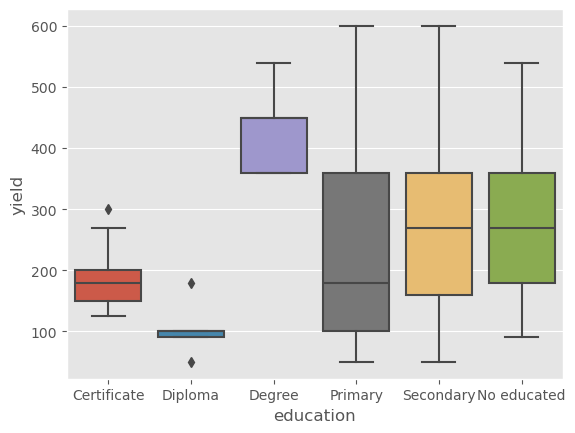

In [28]:
# The education variable behave as:
sns.boxplot(x=corn_subset['education'], y=corn_subset['yield'])

In [29]:
# To validate the variability in yield explained by the farmer's 'education', I'll execute a one-way anova 

# The firts step is spliting the categories in the column as follows:
groups = [group["yield"].values for name, group in corn_subset.groupby("education")]

# Then the actual ANOVA is performed using 
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

print(f"The p-value {p_value} is smaller than 0.05, then there is variability explained by the education of farmers.")
print("Thats why It's important to include  this variable in the model")

F-statistic: 4.838129883074475, P-value: 0.00027306321938453895
The p-value 0.00027306321938453895 is smaller than 0.05, then there is variability explained by the education of farmers.
Thats why It's important to include  this variable in the model


- The variable 'gender':

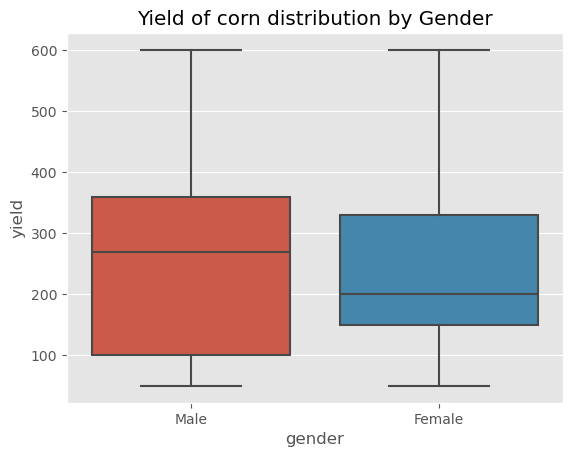

In [30]:
# The 'gender' variable behave as:
sns.boxplot(x="gender", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by Gender")
plt.show()

In [31]:
# Gruoping the dataframe using gender 
male_yield = corn_subset[corn_subset["gender"] == "Male"]["yield"]
female_yield = corn_subset[corn_subset["gender"] == "Female"]["yield"]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Yield of corn for Male:", shapiro(male_yield))
print("Yield of corn for Female:", shapiro(female_yield))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(male_yield, female_yield)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between genders [{p} is smaller than 0.05]')

Normality Test (Shapiro-Wilk):
Yield of corn for Male: ShapiroResult(statistic=0.9241487383842468, pvalue=1.970140147022903e-05)
Yield of corn for Female: ShapiroResult(statistic=0.9340603351593018, pvalue=4.104549145012015e-09)

Levene’s Test for Equal Variance:
Statistic: 14.10703328403133, P-value: 0.00020229504720311082
There is homogeinity of variance between genders [0.00020229504720311082 is smaller than 0.05]


In [32]:
# Use T-test
t_stat, t_p = ttest_ind(male_yield, female_yield, equal_var=True)
print("\nTwo-sample T-test:")
print(f"T-statistic: {t_stat}, P-value: {t_p}")


Two-sample T-test:
T-statistic: 1.6819565062645667, P-value: 0.09347176264933382


As identified, the calculated p-value of 0.0934717 is higher than 0.05. Therefore, there is no statistical difference between the genders of the farmers, and this variable will not be included in our first iteration of the models.

- Variable 'age_braket':

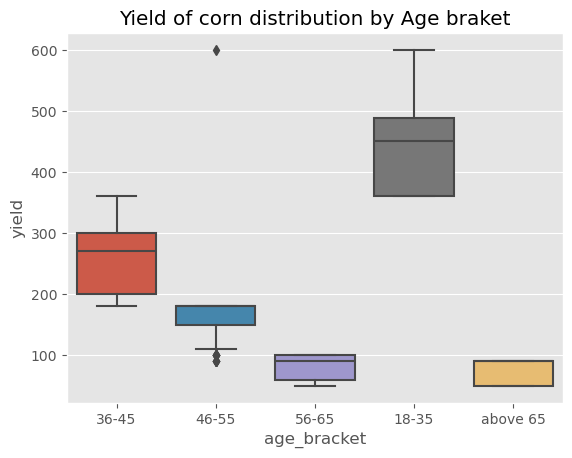

In [33]:
# The 'age_bracket' variable behave as:
sns.boxplot(x="age_bracket", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by Age braket")
plt.show()

In [34]:
# From the illustration above I identifyed atypical data at '46-55' age_bracket category. Then,
# I'll use the function described as:

def atypical_data (df, target, variable, label):

    segment_data = df[df[variable] == label][target]

    Q1 = segment_data.quantile(0.25)
    Q3 = segment_data.quantile(0.75)
    IQR = Q3 - Q1
    Inf_Limit = Q1 - (1.5*IQR)
    Sup_Limit = Q3 + (1.5*IQR)

    outliers = df[(df[variable] == label) & ((df[target] < Inf_Limit) | (df[target] > Sup_Limit))]
    
    return outliers

In [35]:
# The farmers between 46 and 55 years old with atypical production of corn are: 
aty_age = atypical_data(corn_subset, 'yield', 'age_bracket', '46-55')
aty_age.head(15)

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
19,Diploma,Female,46-55,5,0.50,20,3,100,Credit groups,Yes,Public gatherings,National Government,Phone Calls,Kiswahili
22,Diploma,Female,46-55,5,0.25,50,3,90,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
209,Primary,Female,46-55,2,0.75,20,4,100,Family,Yes,Extension services,County Government,SMS text,Kiswahili
210,Primary,Female,46-55,2,0.50,20,3,100,Credit groups,Yes,Extension services,County Government,SMS text,Kiswahili
214,Primary,Female,46-55,2,0.50,20,3,100,Credit groups,No,Public gatherings,National Government,Phone Calls,Kiswahili
240,Primary,Female,46-55,2,0.50,50,4,90,Credit groups,No,Public gatherings,Private Provider,Phone Calls,Kiswahili
270,Secondary,Male,46-55,1,4.00,300,8,600,Savings,No,Radio,County Government,SMS text,Kiswahili
375,Secondary,Female,46-55,4,0.75,25,3,100,Credit groups,Yes,Public gatherings,KALRO,SMS text,Kiswahili
382,Secondary,Female,46-55,5,0.30,25,3,100,Savings,No,Public gatherings,County Government,SMS text,Kiswahili
383,Secondary,Female,46-55,4,1.00,50,2,90,Credit groups,No,Extension services,Private Provider,Phone Calls,Kiswahili


While there is one row in the yield column with 600 units, this individual appears to have greater access to resources. He cultivate four times more land than others and use fertilizer more intensively. He also uses his own financial resources for farming. It is reasonable to infer that this farmer is wealthier than their peers. I concluded that there are no illogical entries in the dataset for this variable.

In [36]:
# The firts step is spliting the categories in the column as follows:
groups_age = [group["yield"].values for name, group in corn_subset.groupby("age_bracket")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("yield of 18-35:", shapiro(groups_age[0]))
print("yield of 36-45:", shapiro(groups_age[1]))
print("yield of 46-55:", shapiro(groups_age[2]))
print("yield of 56-65:", shapiro(groups_age[3]))
print("yield of above 65:", shapiro(groups_age[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_age)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between age brackets [{p} is smaller than 0.05]')

Normality Test (Shapiro-Wilk):
yield of 18-35: ShapiroResult(statistic=0.8395863771438599, pvalue=5.543294889776007e-08)
yield of 36-45: ShapiroResult(statistic=0.9041250944137573, pvalue=5.131573175276571e-07)
yield of 46-55: ShapiroResult(statistic=0.48733508586883545, pvalue=6.713705959714936e-16)
yield of 56-65: ShapiroResult(statistic=0.8015334606170654, pvalue=7.838396527404257e-07)
yield of above 65: ShapiroResult(statistic=0.590883731842041, pvalue=1.3296380529936869e-05)

Levene’s Test for Equal Variance:
Statistic: 12.843165533161223, P-value: 9.278764010475584e-10
There is homogeinity of variance between age brackets [9.278764010475584e-10 is smaller than 0.05]


In [37]:
# Then a one-way ANOVA is performed using 
f_stat, p_value = f_oneway(*groups_age)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

print(f"The p-value {p_value} is smaller than 0.05, then there is variability explained by the age of farmers.")
print("Thats why It's important to include  this variable in the model")

F-statistic: 442.83832687956397, P-value: 1.1520387424452078e-134
The p-value 1.1520387424452078e-134 is smaller than 0.05, then there is variability explained by the age of farmers.
Thats why It's important to include  this variable in the model


- Variable 'household_size': <br>
<br>
The values taken by thi variables are:

In [38]:
print(corn_subset['household_size'].unique())
print('\n While those are numeric values, they are best treated as categories.')

[7 3 6 5 1 2 9 4 8]

 While those are numeric values, they are best treated as categories.


In [39]:
#Transformation of the data type in the variable 'household_size':
corn_subset['household_size'] = corn_subset['household_size'].apply(str)

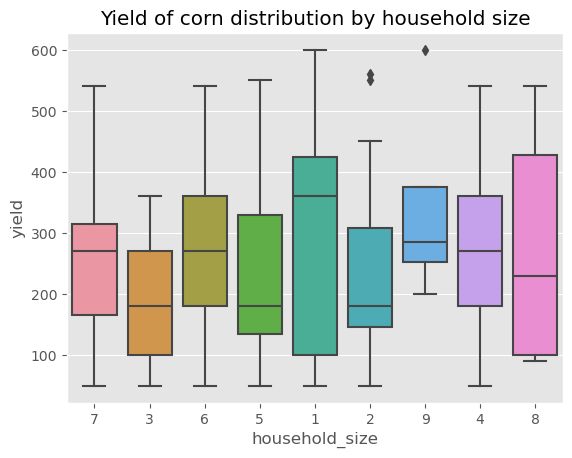

In [40]:
# Now, the 'household_size' variable behave as:
sns.boxplot(x="household_size", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by household size")
plt.show()

In [41]:
# As evaluated in the age_bracket variable, the are some possible outliers at second and nineth categories. Then,
aty_hs_2 = atypical_data(corn_subset, 'yield', 'household_size', '2')
aty_hs_2

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
41,Primary,Female,18-35,2,0.5,40,3,560,Savings,No,Extension services,County Government,SMS text,Kiswahili
272,Secondary,Male,18-35,2,2.0,150,2,550,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili


In [42]:
# And also:
aty_hs_9 = atypical_data(corn_subset, 'yield', 'household_size', '9')
aty_hs_9

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
40,Primary,Female,18-35,9,1.0,50,3,600,Credit groups,No,Public gatherings,Private Provider,Phone Calls,Kiswahili


These are records of farmers that break the consistency of the dataframe, particularly due to the small number of laborers they use. Therefore, it is reasonable to classify them as outliers that should be removed.

In [43]:
# Merging the 2 subsets of outliers:
aty_hs_merged = pd.concat([aty_hs_2, aty_hs_9], axis=0, ignore_index=False)
aty_hs_merged
# Dropping the outliers
corn_subset = corn_subset.drop(aty_hs_merged.index)

In [44]:
# Let's continue the same procedure for categorical variables as before:
groups_hsize = [group["yield"].values for name, group in corn_subset.groupby("household_size")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_hsize):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_hsize)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between household size [{p} is smaller than 0.05]')

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.8795545697212219, pvalue=0.04672493413090706)
yield of 1: ShapiroResult(statistic=0.9173285961151123, pvalue=0.008162393234670162)
yield of 2: ShapiroResult(statistic=0.9358439445495605, pvalue=0.0026786376256495714)
yield of 3: ShapiroResult(statistic=0.9325151443481445, pvalue=0.002094114199280739)
yield of 4: ShapiroResult(statistic=0.9219567179679871, pvalue=0.00010677475074771792)
yield of 5: ShapiroResult(statistic=0.9473256468772888, pvalue=0.007819188758730888)
yield of 6: ShapiroResult(statistic=0.9634010195732117, pvalue=0.7512395977973938)
yield of 7: ShapiroResult(statistic=0.8280540108680725, pvalue=0.1034771054983139)
yield of 8: ShapiroResult(statistic=0.9493671655654907, pvalue=0.566536603762676)

Levene’s Test for Equal Variance:
Statistic: 4.181869419648638, P-value: 8.630420474869085e-05
There is homogeinity of variance between household size [8.630420474869085e-05 is smaller than 0.05]


In [45]:
# Some of the household sizes does not follow a normal distribution. 
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):

stat, p = kruskal(*groups_hsize)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 15.880820122870858, P-value: 0.044118057103630565


The P-value calculated 0.044118057103630565 is smaller than 0.05, then tehre is variability explained by the number of households in the dataset. Therefore, This variable should be included in the model.

- Variable 'laborers':


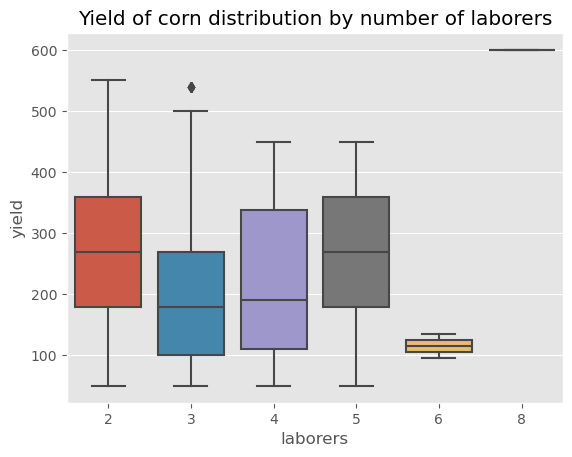

In [46]:
# Now, the 'laborers' variable behave as:
sns.boxplot(x="laborers", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by number of laborers")
plt.show()

In [47]:
#Transformation of the data type in the variable 'laborers':
corn_subset['laborers'] = corn_subset['laborers'].apply(str)

# The are some possible outliers in the category of '3' outliers. Then,
aty_lb_3 = atypical_data(corn_subset, 'yield', 'laborers', '3')
aty_lb_3

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
26,Degree,Male,18-35,6,0.5,20,3,540,Credit groups,No,Radio,Private Provider,Phone Calls,Kiswahili
44,Primary,Female,18-35,4,2.0,50,3,540,Credit groups,No,Extension services,County Government,Phone Calls,Kiswahili
46,Primary,Male,18-35,5,0.5,20,3,540,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
47,Primary,Female,18-35,4,0.5,25,3,540,Credit groups,No,Extension services,Private Provider,SMS text,Kiswahili
48,Primary,Female,18-35,4,1.0,50,3,540,Family,Yes,Radio,Private Provider,Phone Calls,Vernacular
50,Primary,Male,18-35,6,0.5,100,3,540,Credit groups,No,Public gatherings,County Government,Phone Calls,Kiswahili
274,Secondary,Male,18-35,8,0.5,20,3,540,Savings,No,Extension services,County Government,Phone Calls,Kiswahili


However, I have no arguments to eliminate those registries from the dataset. Therefore, I will keep it for now.

In [57]:
# Let's continue the same procedure for categorical variables as before:
groups_laborers = [group["yield"].values for name, group in corn_subset.groupby("laborers")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_laborers):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_laborers)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There isn't homogeinity of variance between number of laborers [{p} is greater than 0.05]")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.9531834721565247, pvalue=5.1066421292489395e-05)
yield of 1: ShapiroResult(statistic=0.8836978077888489, pvalue=1.049409448228289e-08)
yield of 2: ShapiroResult(statistic=0.9193204641342163, pvalue=0.0045183864422142506)
yield of 3: ShapiroResult(statistic=0.9056992530822754, pvalue=0.08465549349784851)
error at 4:
error at 5:

Levene’s Test for Equal Variance:
Statistic: 0.777665024360423, P-value: 0.5663373611801408
There isn't homogeinity of variance between number of laborers [0.5663373611801408 is greater than 0.05]


In [49]:
# The assumption of normally distributed data could not be proven, and there is no evidence of heteroscedasticity. 
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):

stat, p = kruskal(*groups_laborers)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 11.81765698264309, P-value: 0.03737355155094598


The P-value calculated 0.03737355155094598 is smaller than 0.05, then tehre is variability explained by the number of laborers used for corn production. Therefore, This variable should be included in the model.

- Variable 'main_credit_source': 

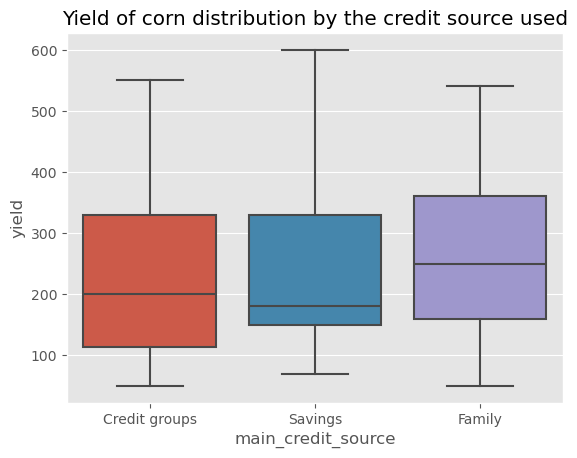

In [50]:
# Now, the 'main_credit_source' variable behave as:
sns.boxplot(x="main_credit_source", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by the credit source used")
plt.show()

In [58]:
# Let's continue the same procedure for categorical variables as before:
groups_credit = [group["yield"].values for name, group in corn_subset.groupby("main_credit_source")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_credit):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_credit)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There unequal variances between credit source types because [{p} is greater than 0.05]")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.9367485046386719, pvalue=3.2421196838328115e-09)
yield of 1: ShapiroResult(statistic=0.9326149821281433, pvalue=0.001920896116644144)
yield of 2: ShapiroResult(statistic=0.8819704055786133, pvalue=0.015891628339886665)

Levene’s Test for Equal Variance:
Statistic: 1.1363844765604671, P-value: 0.32217585973230534
There unequal variances between credit source types because [0.32217585973230534 is greater than 0.05]


In [59]:
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):
stat, p = kruskal(*groups_credit)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 2.7124829702940683, P-value: 0.2576272554200043


The p-value of 0.257627 calculated above is greater than 0.05; therefore, there is no significant impact on corn production due to the source of credit used by the farmers.

- Variable 'farm_records':

In [53]:
for name, group in corn_subset.groupby("main_credit_source"):
    print(f"main_credit_source {name}: {group['yield'].values}")

main_credit_source Credit groups: [300 270 270 200 180 180 180 150 135 125 180 100 100 100  90  90  50 540
 450 450 360 360 360 360  90  50 540 540 540 540 540 540 450 450 450 450
 450 450 450 400 400 360 360 360 360 360 360 360 360 360 360 360 360 360
 360 360 360 330 330 330 330 330 300 270 270 270 270 270 270 270 270 270
 270 270 270 270 270 270 270 250 250 250 250 220 200 200 200 200 200 180
 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 180 160 150 150 135 135 115 110 100 100
 100 100 100 100 100 100 100 100 100 100  90  90  90  90  90  90  90  90
  90  90  90  90  90  90  90  90  80  80  80  75  60  60  50  50  50  50
  50  50  50  50  50 550 540 500 450 450 450 450 450 450 400 400 360 360
 360 360 360 360 360 360 360 360 330 330 330 330 330 300 300 270 270 270
 270 270 270 270 270 270 270 270 270 270 250 250 200 200 200 200 200 180
 180 180 180 180 180 180 180 180 180 150 150 150 150 150 150 150 150 135
 100 100 100 100 

In [54]:
corn_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 421
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   education             348 non-null    object 
 1   gender                348 non-null    object 
 2   age_bracket           348 non-null    object 
 3   household_size        348 non-null    object 
 4   acreage               348 non-null    float64
 5   fertilizer_amount     348 non-null    int64  
 6   laborers              348 non-null    object 
 7   yield                 348 non-null    int64  
 8   main_credit_source    348 non-null    object 
 9   farm_records          348 non-null    object 
 10  main_advisory_source  348 non-null    object 
 11  extension_provider    348 non-null    object 
 12  advisory_format       348 non-null    object 
 13  advisory_language     348 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 40.8+ KB


In [55]:
corn_subset.head()

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
0,Certificate,Male,36-45,7,2.00,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.25,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.00,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.50,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
5,Certificate,Male,46-55,3,0.50,200,2,180,Credit groups,Yes,Radio,National Government,Phone Calls,Kiswahili


## Step 4: Model identification
The model requested is yield centered. 

- feature creation
